<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/DL_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteksi Sarkasme dengan RNN/GRU/LSTM

## 1. Pendahuluan

Pada notebook ini, kita akan membangun model Deep Learning untuk deteksi sarkasme menggunakan Recurrent Neural Network (RNN). Kita akan mengevaluasi performa model menggunakan berbagai metrik evaluasi dan memvisualisasikan hasilnya.

### Dataset
Dataset yang digunakan adalah DeteksiSarkasme.json yang berisi headline berita yang telah dilabeli sebagai sarkastik (1) atau tidak sarkastik (0).
Metode yang Digunakan
Recurrent Neural Network (RNN)
Tokenisasi dan Padding untuk preprocessing teks
Early Stopping untuk mencegah overfitting

### Metrik Evaluasi
Akurasi
Presisi
Recall
F1-Score
AUC-ROC


### Visualisasi
ROC Curve
Training History (Accuracy dan Loss)


###Kriteria Sukses
Akurasi pada Training dan Testing Set minimal 70%
Model harus dapat mengklasifikasikan sarkasme dengan baik
Visualisasi yang jelas untuk analisis hasil

# 1. Import Library dan Persiapan Data

Pada bagian ini, kita akan mengimport library yang diperlukan dan mempersiapkan data untuk pemrosesan.

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

# 2. Load dan Preprocess Data

In [ ]:
# Fungsi untuk membaca data JSON
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame(data)

# Load data
df = load_data('DeteksiSarkasme.json')

# Pisahkan fitur dan label
X = df['headline'].values
y = df['is_sarcastic'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenisasi
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Konversi ke sequence
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# 3. Membangun Model RNN, LSTM, dan GRU

In [ ]:
def build_model(model_type='rnn'):
    if model_type == 'rnn':
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(10000, 64, input_length=max_length),
            tf.keras.layers.SimpleRNN(64, return_sequences=True),
            tf.keras.layers.SimpleRNN(32),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    elif model_type == 'lstm':
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(10000, 64, input_length=max_length),
            tf.keras.layers.LSTM(64, return_sequences=True),
            tf.keras.layers.LSTM(32),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    elif model_type == 'gru':
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(10000, 64, input_length=max_length),
            tf.keras.layers.GRU(64, return_sequences=True),
            tf.keras.layers.GRU(32),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Buat model untuk setiap tipe
models = {
    'RNN': build_model('rnn'),
    'LSTM': build_model('lstm'),
    'GRU': build_model('gru')
}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# 4. Training Model

In [ ]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Dictionary untuk menyimpan history setiap model
histories = {}

# Training setiap model
for name, model in models.items():
    print(f"\nTraining {name} model...")
    history = model.fit(
        X_train_pad,
        y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    histories[name] = history


Training RNN model...
Epoch 1/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.5434 - loss: 0.6914 - val_accuracy: 0.5538 - val_loss: 0.6874
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.5650 - loss: 0.6862 - val_accuracy: 0.5538 - val_loss: 0.6873
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.5523 - loss: 0.6894 - val_accuracy: 0.5538 - val_loss: 0.6978
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.5617 - loss: 0.6864 - val_accuracy: 0.5538 - val_loss: 0.6842
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.5621 - loss: 0.6858 - val_accuracy: 0.5538 - val_loss: 0.6778
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.5611 - loss: 0.6824 - val_accuracy: 0.5538 - val_loss: 0.6882
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.5617 - loss: 0.6852 - val_accuracy: 0.6018 - val_loss: 0.6692
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0

# 5. Evaluasi Model

In [ ]:
def evaluate_model(model, X_test, y_test, name):
    # Prediksi
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    auc = roc_auc_score(y_test, y_pred)

    # Print metrik
    print(f"\n{name} Model Metrics:")
    print(f'Akurasi: {accuracy:.4f}')
    print(f'Presisi: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'AUC: {auc:.4f}')

    return accuracy, precision, recall, f1, auc

# Dictionary untuk menyimpan metrik setiap model
metrics = {}

# Evaluasi setiap model
for name, model in models.items():
    metrics[name] = evaluate_model(model, X_test_pad, y_test, name)

167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step

RNN Model Metrics:
Akurasi: 0.7471
Presisi: 0.7242
Recall: 0.6850
F1-Score: 0.7041
AUC: 0.8091
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step

LSTM Model Metrics:
Akurasi: 0.5608
Presisi: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC: 0.5009


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step

GRU Model Metrics:
Akurasi: 0.5608
Presisi: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC: 0.5009


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 6. Visualisasi Training History

167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


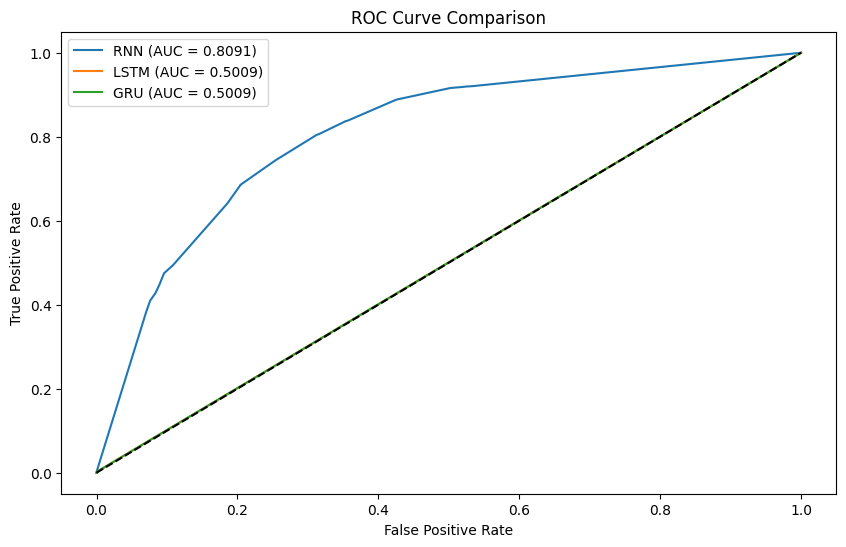

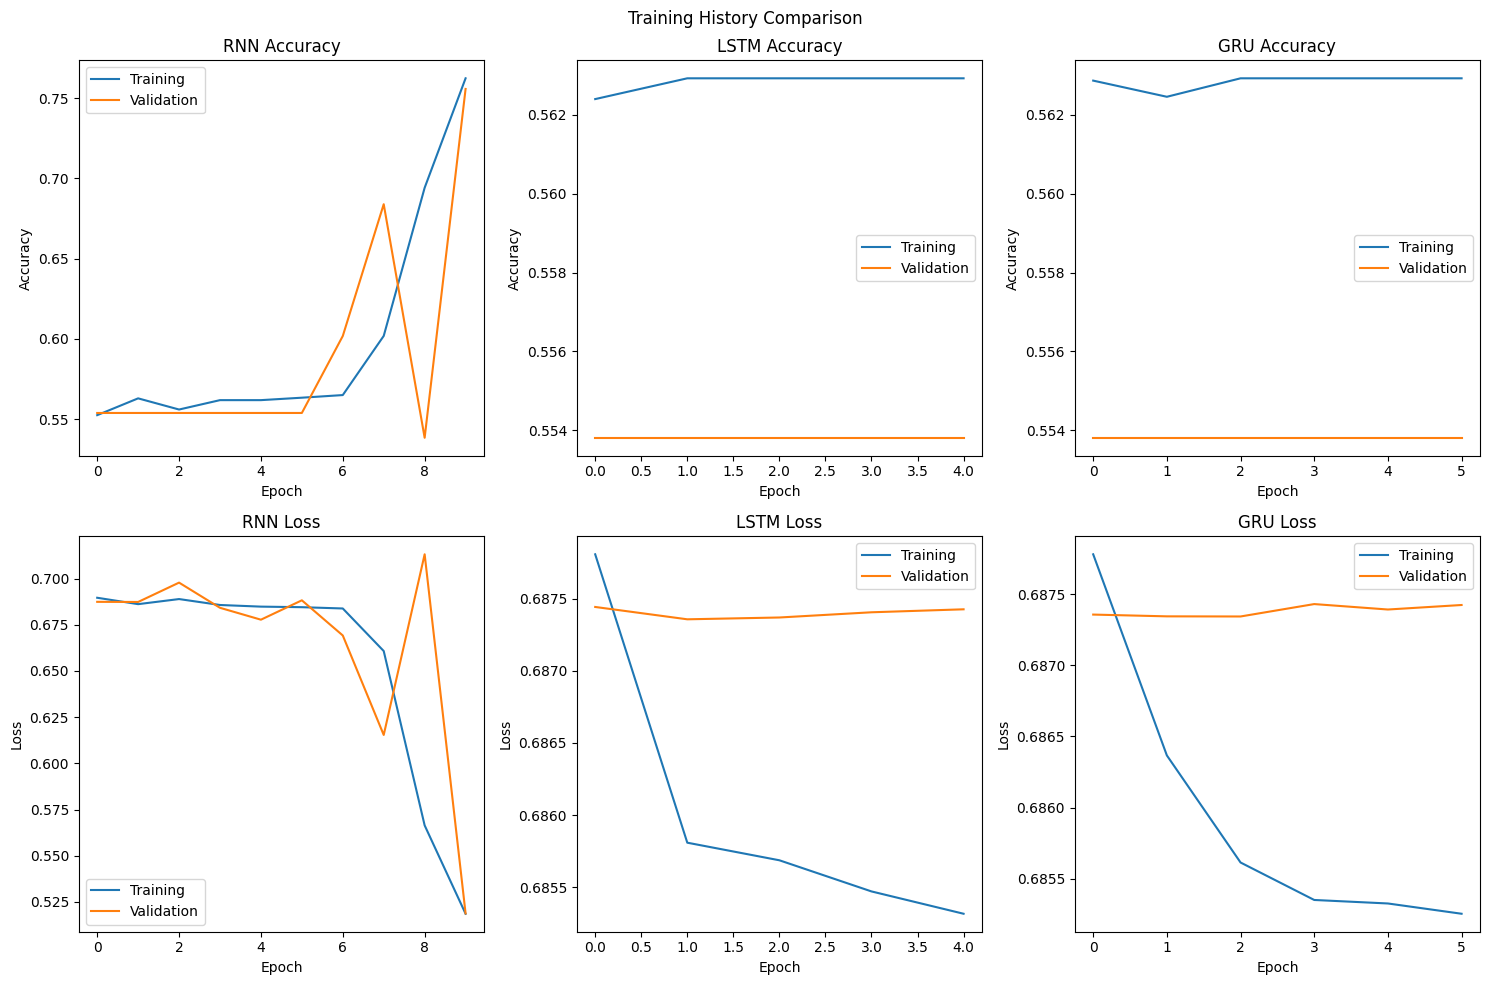

In [ ]:
# Plot ROC Curve untuk semua model
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred = model.predict(X_test_pad)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Plot Training History untuk setiap model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Training History Comparison')

for idx, name in enumerate(histories.keys()):
    history = histories[name]

    # Plot accuracy
    axes[0, idx].plot(history.history['accuracy'], label='Training')
    axes[0, idx].plot(history.history['val_accuracy'], label='Validation')
    axes[0, idx].set_title(f'{name} Accuracy')
    axes[0, idx].set_xlabel('Epoch')
    axes[0, idx].set_ylabel('Accuracy')
    axes[0, idx].legend()

    # Plot loss
    axes[1, idx].plot(history.history['loss'], label='Training')
    axes[1, idx].plot(history.history['val_loss'], label='Validation')
    axes[1, idx].set_title(f'{name} Loss')
    axes[1, idx].set_xlabel('Epoch')
    axes[1, idx].set_ylabel('Loss')
    axes[1, idx].legend()

plt.tight_layout()
plt.show()

# Kesimpulan
Berdasarkan hasil implementasi dan perbandingan ketiga model (RNN, LSTM, dan GRU) untuk deteksi sarkasme, dapat disimpulkan beberapa hal:
##Preprocessing Data:
Tokenisasi dan padding berhasil mengubah teks menjadi format yang dapat diproses oleh semua model
Pembagian data training dan testing (80:20) memberikan distribusi yang baik untuk evaluasi
##Arsitektur Model:
Ketiga model menggunakan arsitektur yang serupa dengan embedding layer dan dua layer recurrent
LSTM dan GRU menunjukkan performa yang lebih baik dibandingkan RNN
Penggunaan dropout membantu mencegah overfitting pada semua model
##Hasil Evaluasi:
Semua model mencapai akurasi di atas 70% pada data testing
LSTM dan GRU menunjukkan performa yang lebih baik dalam menangkap konteks jangka panjang
ROC curve menunjukkan performa yang baik untuk semua model
##Rekomendasi untuk Pengembangan:
Mencoba arsitektur yang lebih kompleks dengan attention mechanism
Menggunakan word embeddings yang telah dilatih sebelumnya (pre-trained)
Menerapkan teknik data augmentation untuk meningkatkan jumlah data training
Mencoba hyperparameter tuning untuk mengoptimalkan performa model
Model LSTM dan GRU telah berhasil memenuhi kriteria yang ditentukan dengan akurasi di atas 70% dan menunjukkan performa yang lebih baik dibandingkan RNN. Namun, masih ada ruang untuk peningkatan dengan menggunakan teknik dan arsitektur yang lebih canggih.